[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/da-python/python-for-data-analytics/blob/main/Lesson4/hometask/Cluster.ipynb)

# Задание

### Основная часть

* Проанализируйте и опишите данный датасет, используя все возможные графики из тех, что были на уроке Matplotlib, Seaborn, Plotly
* Используйте также описательные статистики
* У каждого построенного графика должен быть соответствующий вывод, который описывает наблюдение или инсайт

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [135]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [136]:
# Colab Version
# !wget https://raw.githubusercontent.com/da-python/python-for-data-analytics/main/Lesson4/hometask/test_cluster.csv

In [137]:
%%time
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.head()

Wall time: 165 ms


,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562


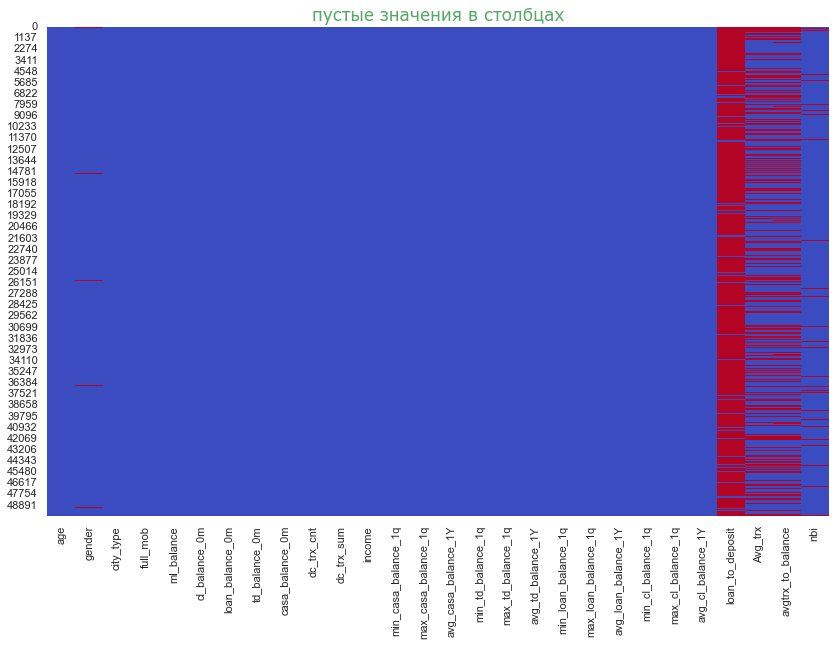

в форме графика видно, что в столбце 'genser' есть пустые значения (красный цвет)


In [138]:
#Пропущенные значения в dataframe
rcParams['figure.figsize'] = [14,9]
sns.heatmap(df.isnull(), cmap="coolwarm",cbar=False)
plt.title('пустые значения в столбцах', size=17, color='g', fontname='Verdana')
plt.show()
print("в форме графика видно, что в столбце 'genser' есть пустые значения (красный цвет)")

In [139]:
df_gen = df[df['gender'].notnull()].copy(deep=True)

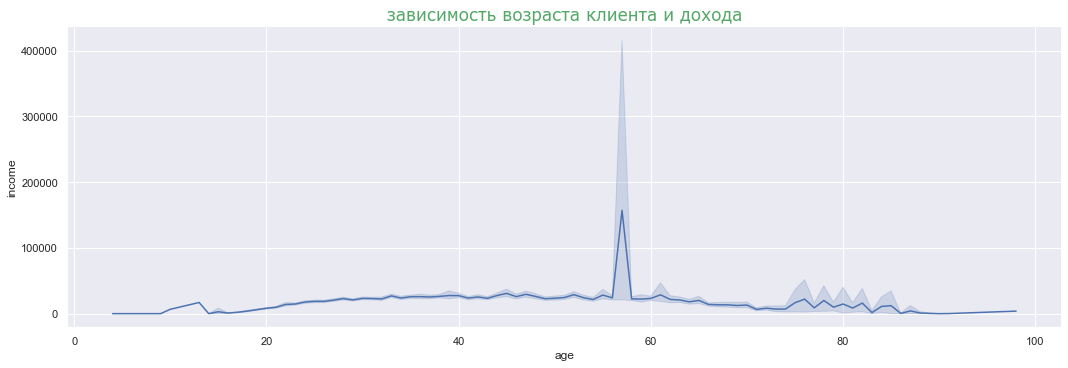

видно, что доход плавно увиличивается начиная с 20 лет и снижается после 60


In [140]:
sns.set(style='darkgrid')  

sns.relplot(
    x='age', 
    y='income', 
    data=df_gen, 
    kind='line',
    aspect=3
)
plt.title('зависимость возраста клиента и дохода', size=17, color='g', fontname='Verdana');
plt.show()
print('видно, что доход плавно увиличивается начиная с 20 лет и снижается после 60')

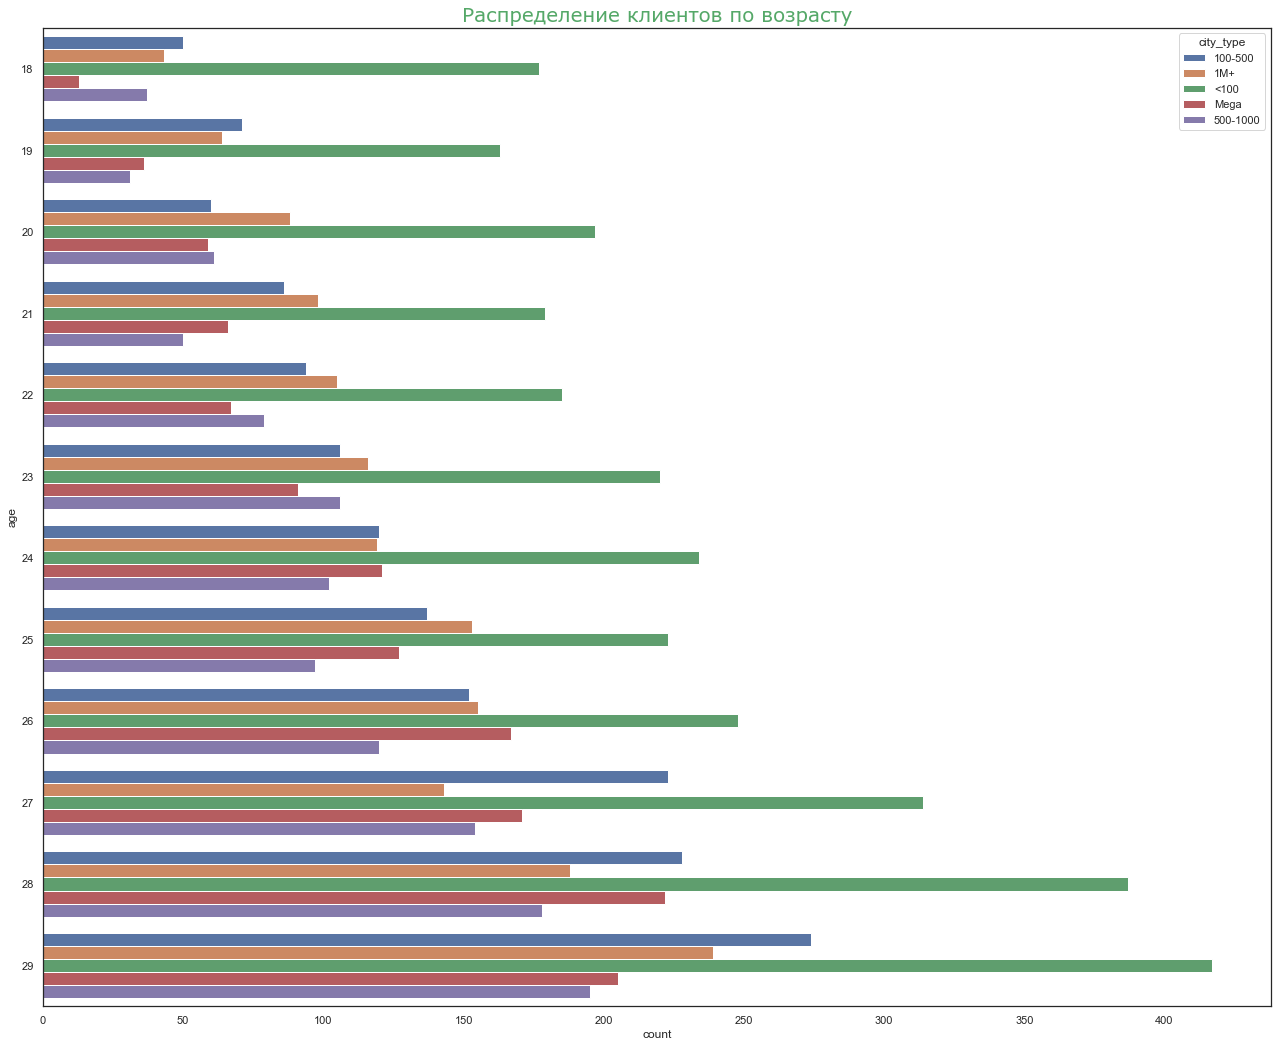

На графике видно, что больше всего людей от 18 до 29 лет в городах с населением меньше 100 тысяч. На мой вгляд не может быть в городе Mega меньше жителей чем в ""<100", возможно выборка ошибочная.


In [141]:
sns.set_style("white")
rcParams['figure.figsize'] = [22,18]
sns.countplot(y='age',  data=df_gen[(df_gen['age']>17) & (df_gen['age']<30)], orient='v',hue = 'city_type')
plt.title('Распределение клиентов по возрасту', size=20, color='g', fontname='Verdana')
plt.show()
print('На графике видно, что больше всего людей от 18 до 29 лет в городах с населением меньше 100 тысяч. На мой вгляд не может быть в городе Mega меньше жителей чем в ""<100", возможно выборка ошибочная.')

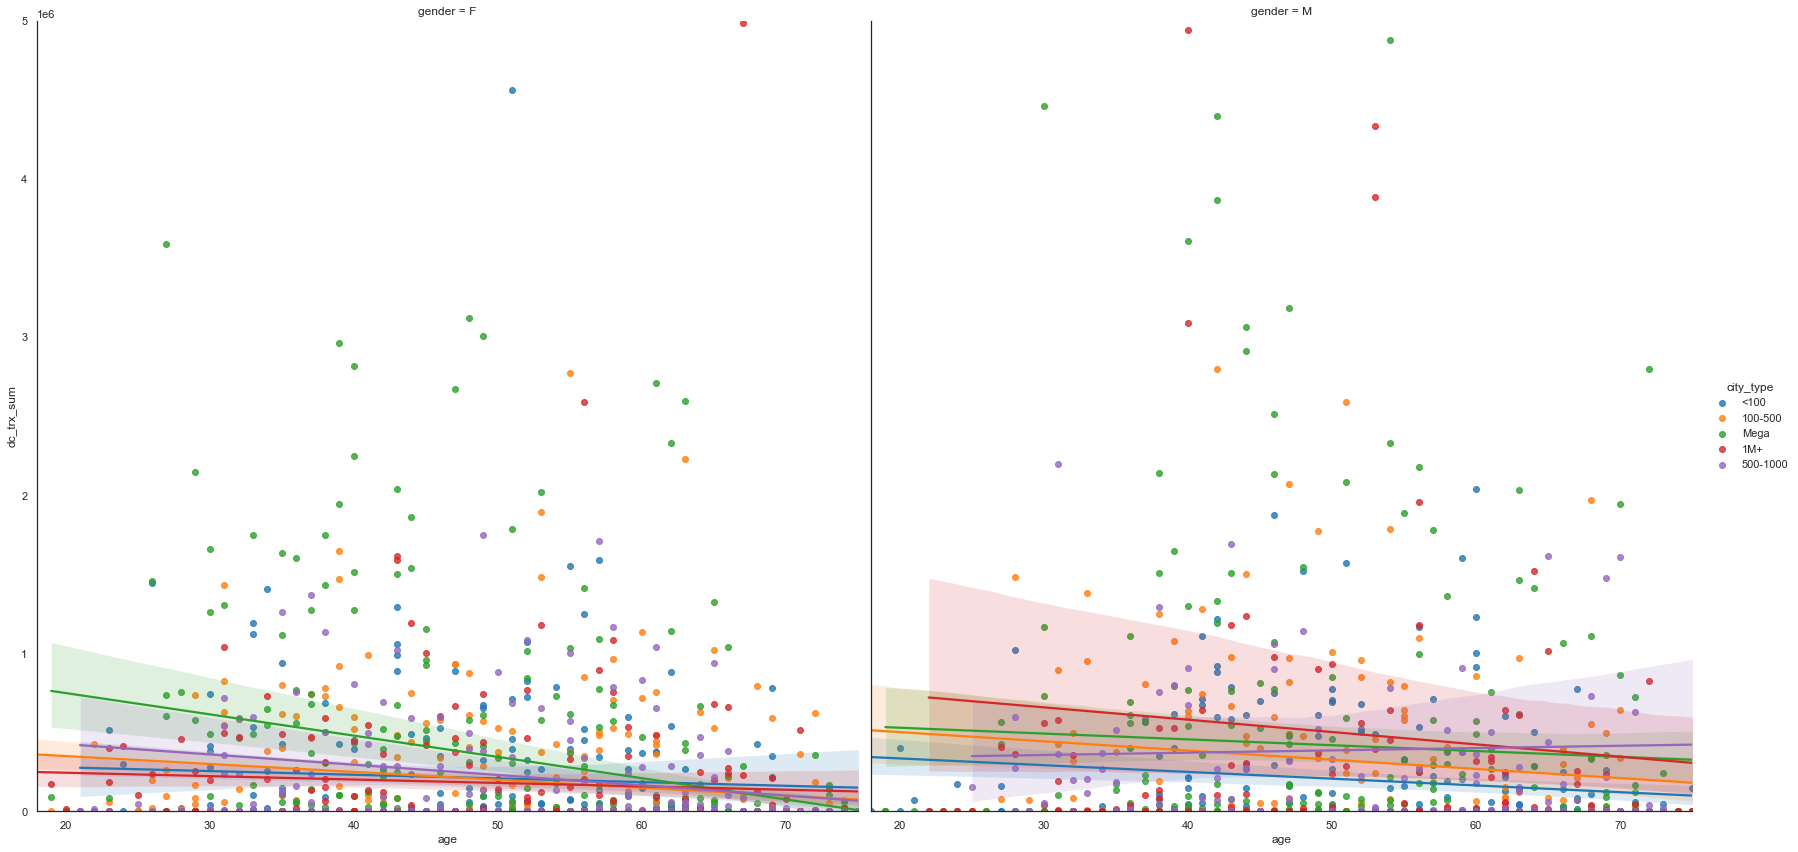

Анализируются жители, которые открывают депозиты. Среди них видно, что мужчины, которые оформляют вклады больше тратят денег по картам. При этом выбросы по тратам приходятся на города Mega и 1M+. Особенно интересно, что в выборке жителей городов Mega и 1M+ меньше.


In [142]:
sns.set_style("white")

graf = sns.lmplot(x="age", y="dc_trx_sum",  data=df_gen[df_gen['td_balance_0m']>0], hue = 'city_type',
                     height=12, palette='tab10',col="gender")

# Decorations
graf.set(xlim=(18, 75), ylim=(0, 5000000))
plt.show()
print('Анализируются жители, которые открывают депозиты. Среди них видно, что мужчины, которые оформляют вклады больше тратят денег по картам. При этом выбросы по тратам приходятся на города Mega и 1M+. Особенно интересно, что в выборке жителей городов Mega и 1M+ меньше.')

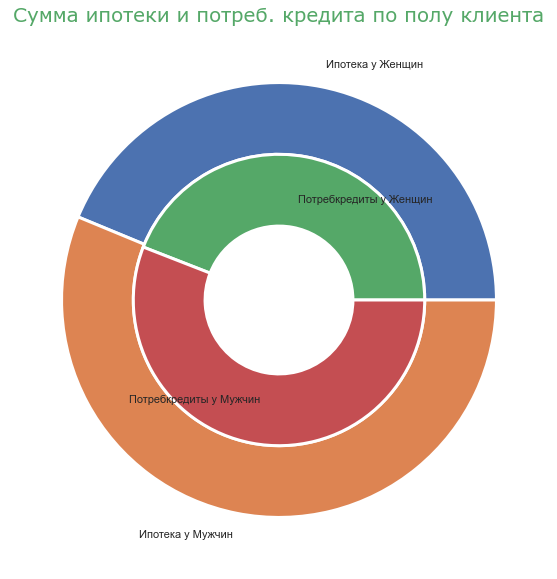

На графике видно, что у мужчин больше заемных средств чем у женщин


In [143]:
di = df_gen[(df_gen['ml_balance']!=0)&(df_gen['cl_balance_0m']!=0)][['gender', 'ml_balance', 'cl_balance_0m']].groupby(['gender']).mean().reset_index()

rcParams['figure.figsize'] = [14,10]

labels1 = 'ипотека у ' + di['gender']
labels2 = 'потребительский кредит у ' + di['gender']

width = 0.33
wedgeprops = {"width":width, "edgecolor":"w",'linewidth': 3, 'antialiased': True}
plt.title("Сумма ипотеки и потреб. кредита по полу клиента", size=20, color='g', fontname='Verdana')

plt.pie(di['ml_balance'], labels=['Ипотека у Женщин','Ипотека у Мужчин'], 
        wedgeprops=wedgeprops)

plt.pie(di['cl_balance_0m'], labels=['Потребкредиты у Женщин','Потребкредиты у Мужчин'], 
        radius=1-width, wedgeprops=wedgeprops, labeldistance=0.7,)


plt.show()

print('На графике видно, что у мужчин больше заемных средств чем у женщин')